In [1]:
# import biblioteka

import pandas as pd
import numpy as np
import pytesseract
from PIL import Image
import cv2

In [2]:
# ucitavanje slike

path = 'slika.jpg'
image = Image.open(path)


In [3]:
text = pytesseract.image_to_string(image)

print(text)  # Trebalo bi da prikaže prepoznat tekst

4
yy
|
|

j

Wy joc 440, 4

}

AY ATY = =4oo/ me
AX 182= 4680 , ane
‘3y 106< Me ae
AXA $20 7
i MBE Alien

As. we a

> iT Vy ww ty ey KOA ee
&
LI OI, coz
AX 36 %=220- AXIOG= 910,
2X |f4= 8D," 2% {09= 600,
Ax 106 = 142. 1X 312 226
Ay | fe fige. ae ee
oo. 130 a Ss 120.
A209) 130.2.) ALIE22 42S,
SX L292 650,,.... Ux Me GOD -
2X WYG=s foo- | ee
AX 229 = =130
Mx 2002440, | AX363-23¢

AK oe Mi

AX Mea 480,

Ay 924% \te Za
fy (232 oo ya
Ay. IGA r= Go, va
W3I2 = 229 ii
WK 240-8497
AX [09 =339.—
Ay 232 = 850 —
OO ie Saag

29-509. [als SG ea

ae



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


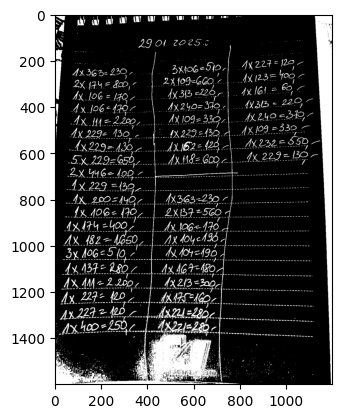

In [5]:
_, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()

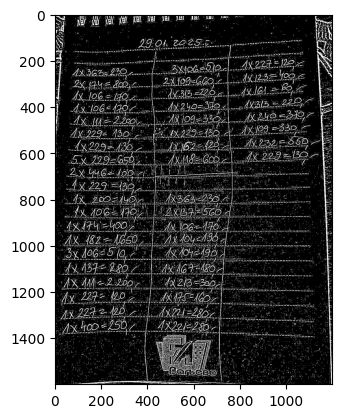

In [6]:
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Prikazivanje slike sa adaptive thresholding-om
plt.imshow(thresh, cmap='gray')
plt.show()

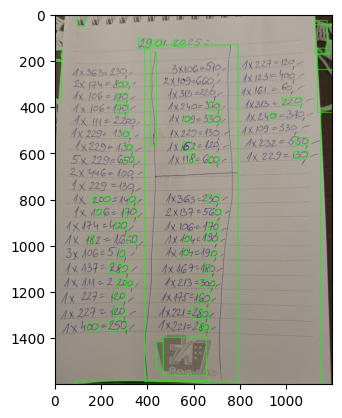

In [7]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crtanje kontura na originalnoj slici
contoured_image = image.copy()
for contour in contours:
    if cv2.contourArea(contour) > 400:  # Filtriranje malih kontura
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contoured_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Prikazivanje slike sa konturama
plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
plt.show()

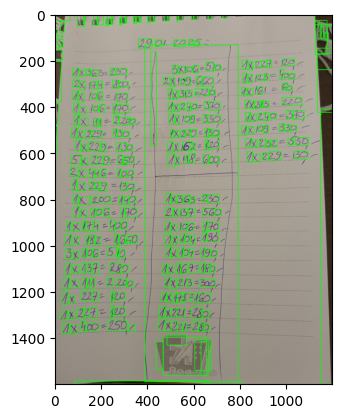

In [8]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crtanje kontura na originalnoj slici
contoured_image = image.copy()
for contour in contours:
    if cv2.contourArea(contour) > 80:  # Filtriranje malih kontura
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contoured_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Prikazivanje slike sa konturama
plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(thresh, config="--psm 11 digits")

print("Prepoznat tekst:", text)

Prepoznat tekst: 2 .

29

6

2

65

062-140

72

220



In [12]:
import easyocr

reader = easyocr.Reader(["en"])
text = reader.readtext("slika.jpg", detail=0)

print("Prepoznat tekst:", text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Prepoznat tekst: ['29 04.', '2025 &', 'Ax 363-.232', '3x1062510', 'Ax227=122,', '444 = 8o21', '2X 40g-600,', '4x123=', '6o', 'KxJo6 = Izo', '[x313 -222', 'Ax I61', '4xlo6-41Q', 'Ax2y0=340', '4x3u3', '220', 'Ax IIA = 229,', 'Kx 10g=.332', 'Ax 2402319', '2292', '130', '{X2292430', 'Ax1o9.2339', '(x229=.438_', 'Ax162=.424', 'Ax2322.558', '229=6592', 'Axll&a.', '4x2292132', '2X.446_.lo0', 'Lx22s', 'Ax2022449', '[x363-230', 'X 406 - 410', '2X13:z560', 'Axltlzloo', 'AxIo6- 4Jo', 'x_182 =4650_', 'Ax', '40yz198', '3x .4o6-510', 'Kx 1oy-Igo', 'Lx 431 2.180', 'Ax 46x-(8O.', 'Ax AM z2 2D0.', '(x213', 'Ax2232_19', 'AxAI-AC2', 'Ax 223 = ke', '(x221-2802', '2', '(x2zl2286-', 'Banela', 'Yoo', '2X', 'Jx', '602', '5X', '219', '284', '256', 'Ax4oo']
